# Temporal Difference (Lambda)

In [4]:
import sys
sys.path.insert(1, '../')

In [5]:
import warnings
import gym, gym_walk
from td_lambda import td_lambda
from utils.common_utils import (evaluate_policy, print_policy_success_stats,
                                plot_state_value_function, plot_policy, rmse)
warnings.filterwarnings('ignore')

In [6]:
env = gym.make('RandomWalk-v0')
init_state = env.reset()
goal_state = 6
gamma = 1.0  # Episodic
n_episodes = 500
P = env.env.P

LEFT, RIGHT = range(2)
pi = lambda s: {
    0: LEFT, 1: LEFT, 2: LEFT, 3: LEFT, 4: LEFT, 5: LEFT, 6: LEFT
}[s]
action_symbols = ['<', '>']
row, col = 1, 7

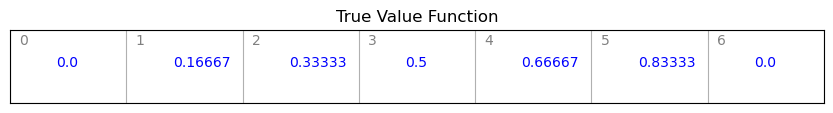

By using the Policy, success rate to reach goal is: 53.00%
By using the Policy, mean reward is: 0.4500


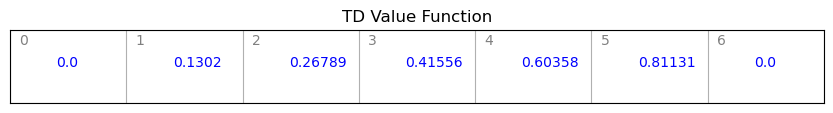

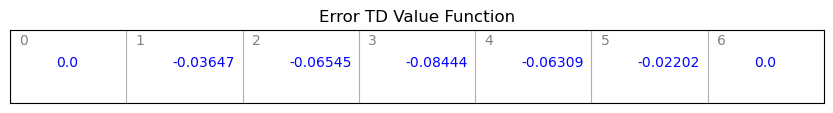

RMSE: 0.0496


In [7]:
V_true = evaluate_policy(pi, P, gamma=gamma)
plot_state_value_function(row, col, V_true, 'True Value Function')
print_policy_success_stats(env, pi, goal_state=goal_state, gamma=gamma)

V_tdl = td_lambda(pi, env, gamma=gamma, n_episodes=n_episodes, lamda=0.5)
plot_state_value_function(row, col, V_tdl, 'TD Value Function')
plot_state_value_function(row, col, V_tdl - V_true, 'Error TD Value Function')

print('RMSE:', rmse(V_tdl, V_true))